In [1]:
#LARS.ipynb Least Angle Regression algorithm for Predicting Wine Taste

In [2]:

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

#Functions

def mean(list):
    return sum(list)/len(list)

def sd(list):
    diff2 = [(list[i]-mean(list))**2 for i in range(len(list))]
    return (sum(diff2)/len(list))**0.5
   
def LARS(x, y, steps=350, stepsize=0.004):
    
    #Find mean, sd, z of data

    nrows = len(x)
    ncols = len(x[0])

    colmean=[mean(np.transpose(x)[i]) for i in range(ncols)]
    labelsmean=mean(y)

    colsd=[sd(np.transpose(x)[i]) for i in range(ncols)]
    labelssd=sd(y) 
    
    dataZ=[]
    for i in range(nrows):
        rowZ = [(x[i][j]-colmean[j])/colsd[j] for j  in range(ncols)]
        dataZ.append(rowZ)

    labelsZ = [(y[i]-labelsmean)/labelssd for i in range(nrows)]

#Initialise beta

    beta = [0.0]*ncols

#Initialise matrix of betas at each step

    betaMat = []
    betaMat.append(list(beta))

#Number of steps to take

    error = []*steps
    for i in range(steps):

    #Calculate Residuals - Residual(row) = normalised residual
        residuals=[0.0] * nrows
        for j in range(nrows):
            residuals[j] = labelsZ[j]-sum([dataZ[j][k]*beta[k] for k in range(ncols)])

    #Calculate correlations for each column = sum(dataZ(row)*res(row)) / nrow
        corr = [0.0]*ncols
        for j in range(ncols):
            corr[j] = sum([dataZ[k][j]*residuals[k] for k in range(nrows)])/nrows

    #Column with highest correlation
        iStar = 0   
        corrStar = corr[0] 
        for j in range(1,ncols):
            if abs(corrStar)<abs(corr[j]):
                iStar = j   
                corrStar = corr[j]

    #Increment by stepsizeif positive correlation, or decrement if negative correlation
        beta[iStar] += stepsize * corrStar /abs(corrStar)
        betaMat.append(list(beta))
        Error = sum([abs(residuals[j]) for j in range(nrows)])
        error.append(Error)

    for i in range(ncols):
        coefCurve = [betaMat[k] for k in range(steps)]
        xaxis = range(steps)
        plt.plot(xaxis, coefCurve)
    plt.xlabel("Step")
    plt.ylabel("Coefficient Values")
    plt.show()

    return betaMat, error, 

In [3]:
#Clean data

path = '/Users/Adil/Documents/Data Science/Machine Learning/wines'
data = open(path).read()
data=data.splitlines()
data.pop(0)
for i in range(len(data)):
    data[i]=data[i].split(';')
    for j in range(len(data[i])):
        data[i][j]=float(data[i][j])

labels = [data[i][-1] for i in range(len(data))]
for i in range(len(data)):
    data[i].pop()

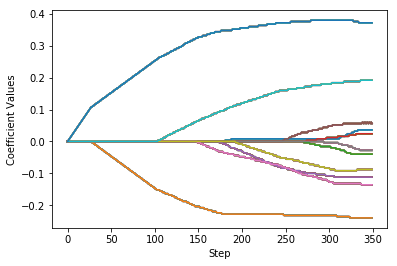

In [4]:
b, e = LARS(data, labels)

In [7]:
e[0]

1353.1260550952752